# Lambda Functions

## Table of Contents
- [What is a lambda function?](#whatis)
- [Parts of a function](#parts)
- [What are lambdas for?](#whatfor)
- [Callback Pattern](#callback)
- [Recap](#recap)

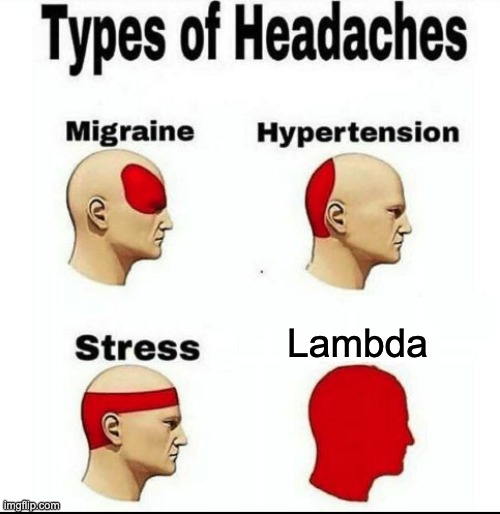

## What is a lambda function? <a name=whatis></a>
#### Anonymous function
Whenever we define a function using the keyword `def`, we must give it a name. The name is what we use to call the function later.

When we say lambda functions are anonymous, we are saying that this function does not have a explicitely defined name.

Let's check it:

In [1]:
def add5(n):
    return n+5
add5(5)

10

As we known, functions are objects in python and they have their own class `function`. We can both access the `__name__` attribute to see it or even asign a function to a variable.

In [2]:
add5

<function __main__.add5(n)>

In [3]:
type(add5)

function

In [4]:
add5.__name__

'add5'

Functions asigned to a variable will mantain it's original attributes, such as name.

In [5]:
a5 = add5
a5(3)

8

In [6]:
add5.__name__

'add5'

It is not only valid for user defined functions, but also for built-in functions, such as `print`.

In [7]:
p = print
p("Hello,World!")

Hello,World!


In [8]:
p.__name__

'print'

## Parts of a function <a name=parts></a>
- Name
- Parameters
- Code (Action/Operation)
- return 

_functions with no return, do return something: None_

### A generic function
```python
def name(parameter1,parameter2="default_value"):
    return action(parameter1,parameter2)
# Calls to function
name(arg1)
name(arg1,arg2)
```

### Syntax of a lambda function
```python
# keyword lambda
lambda parameter1,parameter2: action(parameter1,parameter2)
```

It can even keep the default value:

```python
lambda parameter1,parameter2="default_value": action(parameter1,parameter2)
```

Acctually, lambda functions can do almost everything a regular function can do.

![Tim Toady](https://memegenerator.net/img/instances/400x/65488698.jpg)

#### Did you know?
There is such a thing as a `universal definition` for a function in python, that is a definition that applies to all functions.
```python
def func(*args,**kwargs):
```

Or, in lambda form:

```python
lambda *args,**kwargs:
```

_More on that on future chapters_

### Let's try and write our add5 function as a lambda function and check the difference

In [9]:
lambda n: n+5

<function __main__.<lambda>(n)>

##### Calling lambda function immediately after definition
- `function(args)`

In [10]:
(lambda n: n+5)(8)

13

In [11]:
add5

<function __main__.add5(n)>

In [12]:
lambda_add5 = lambda n: n+5

In [13]:
lambda_add5(4)

9

# What are lambdas for? <a name=whatfor></a>

Even though lambda functions can be used just as regular functions, they should not be used as our main tool. They can be hard to read and defeat the reason for functional programming.

Nevertheless, they do have their place and should be properly mantained in our tool box.

In [14]:
students = ['Alejandro', 'Alfredo', 'Ana de L', 'Ana G', 'Ángela', 'Toni', 'Carlota', 'Cristina', 'Floren', 'Jeancha', 'Juanjo', 'Mario', 'Paola', 'Santi', 'Sonia', 'Xabier', 'Marina', 'Sergio']

In [15]:
def salute(stud):
    print(f"Hello, {stud}! Welcome!")

### One use functions and Callback pattern <a name=callback></a>
# Callback!!!

One of the most prevalent uses of lambda functions is when we need a function object for something in a callback patter (i.e.: a function as an argument for a different function).
For example, when we want to use map, filter, reduce, apply or any other function that takes a function as an argument

![whocall](https://i.imgflip.com/4u9g6l.jpg)

In [16]:
# map(function,iter)
list(map(lambda stud: f"Hello, {stud}! Welcome!",students))

['Hello, Alejandro! Welcome!',
 'Hello, Alfredo! Welcome!',
 'Hello, Ana de L! Welcome!',
 'Hello, Ana G! Welcome!',
 'Hello, Ángela! Welcome!',
 'Hello, Toni! Welcome!',
 'Hello, Carlota! Welcome!',
 'Hello, Cristina! Welcome!',
 'Hello, Floren! Welcome!',
 'Hello, Jeancha! Welcome!',
 'Hello, Juanjo! Welcome!',
 'Hello, Mario! Welcome!',
 'Hello, Paola! Welcome!',
 'Hello, Santi! Welcome!',
 'Hello, Sonia! Welcome!',
 'Hello, Xabier! Welcome!',
 'Hello, Marina! Welcome!',
 'Hello, Sergio! Welcome!']

In [17]:
## Using the parameter `key` on sorted.
# Sort the names of students by the length.

# sorted(lst,key=function)
sorted(students, key=lambda name: len(name))

['Toni',
 'Ana G',
 'Mario',
 'Paola',
 'Santi',
 'Sonia',
 'Ángela',
 'Floren',
 'Juanjo',
 'Xabier',
 'Marina',
 'Sergio',
 'Alfredo',
 'Carlota',
 'Jeancha',
 'Ana de L',
 'Cristina',
 'Alejandro']

In [18]:
# Filtering only students with an even number of characters:

# filter(function,iter)
list(filter(lambda name: len(name)%2 , students))

['Alejandro',
 'Alfredo',
 'Ana G',
 'Carlota',
 'Jeancha',
 'Mario',
 'Paola',
 'Santi',
 'Sonia']

In [19]:
# Using reduce to make a small table
# Remember that reduce functions take 2 arguments
from functools import reduce
max_len = max(map(len,students))

# reduce(func,iter,acc)
table = reduce(lambda acc,name: f"{acc}|{name.center(max_len)}|\n+{'-'*max_len}+\n",\
               students,\
               f"+{'-'*max_len}+\n")
# You can use \ to split a single line of code in multiple lines
print(table)

+---------+
|Alejandro|
+---------+
| Alfredo |
+---------+
| Ana de L|
+---------+
|  Ana G  |
+---------+
|  Ángela |
+---------+
|   Toni  |
+---------+
| Carlota |
+---------+
| Cristina|
+---------+
|  Floren |
+---------+
| Jeancha |
+---------+
|  Juanjo |
+---------+
|  Mario  |
+---------+
|  Paola  |
+---------+
|  Santi  |
+---------+
|  Sonia  |
+---------+
|  Xabier |
+---------+
|  Marina |
+---------+
|  Sergio |
+---------+



In [20]:
import pandas as pd

In [21]:
df = pd.read_csv("../datasets/pokemon.csv")

In [22]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


#### In pandas, mapping over columns is done with the method .apply
- To select a columns, we treat the DataFrame as a dict and column names as keys
```python
df[col].apply(function)
```

In [23]:
df["Name"]

0                  Bulbasaur
1                    Ivysaur
2                   Venusaur
3      VenusaurMega Venusaur
4                 Charmander
               ...          
795                  Diancie
796      DiancieMega Diancie
797      HoopaHoopa Confined
798       HoopaHoopa Unbound
799                Volcanion
Name: Name, Length: 800, dtype: object

In [24]:
def lower(string):
    return string.lower()

In [25]:
lower

<function __main__.lower(string)>

In [26]:
df["Name"].apply(lower)

0                  bulbasaur
1                    ivysaur
2                   venusaur
3      venusaurmega venusaur
4                 charmander
               ...          
795                  diancie
796      dianciemega diancie
797      hoopahoopa confined
798       hoopahoopa unbound
799                volcanion
Name: Name, Length: 800, dtype: object

#### Using lambda:

In [27]:
# Lambdas are usefull to call methods where we syntactically need functions
df["Name"].apply(lambda x: x.lower())

0                  bulbasaur
1                    ivysaur
2                   venusaur
3      venusaurmega venusaur
4                 charmander
               ...          
795                  diancie
796      dianciemega diancie
797      hoopahoopa confined
798       hoopahoopa unbound
799                volcanion
Name: Name, Length: 800, dtype: object

##### Chaining methods:

In [28]:
x = "VenusaurMega Venusaur"


x      .lower().replace("mega","MEGA")
"VenusaurMega Venusaur".lower()    .replace("mega","MEGA")
'venusaurmega venusaur'.replace("mega","MEGA")
'venusaurMEGA venusaur'

'venusaurMEGA venusaur'

In [29]:
def data_checker(data,check_func):
    return [check_func(d) for d in data]
lst = [7,2,3,7,1,89,4,8,0,3,4,-56]
data_checker(lst,lambda x: x<4)

[False, True, True, False, True, False, False, False, True, True, False, True]

In [30]:
data_checker(lst,lambda x: x<0)

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True]

In [31]:
data_checker(lst,lambda x: x%2==0)

[False, True, False, False, False, False, True, True, True, False, True, True]

In [32]:
# +, -, *, /
operations = {
    "+": lambda a,b: a+b,
    "-": lambda a,b: a-b,
    "*": lambda a,b: a*b,
    "/": lambda a,b: a/b
}
def calc(a,func,b):
    return func(a,b)

In [33]:
calc(5,operations["/"],2)

2.5

In [34]:
calc(5,operations["+"],2)

7

In [35]:
calc(7,lambda x,y: x**y,2)

49

In [36]:
def salute(title,name,lastname):
    fullname = f"{name.title()} {lastname.title()}"
    return f"Hello, {title} {fullname}"

In [37]:
salute("Mr.","pepe","Cruz")

'Hello, Mr. Pepe Cruz'

In [38]:
salute("Mrs.", "Lola", "lopez")

'Hello, Mrs. Lola Lopez'

In [39]:
def salute_title(title):
    return lambda name,lastname: salute(title, name, lastname)

In [40]:
salute_title("H.M.")("Elizabeth", "II")

'Hello, H.M. Elizabeth Ii'

In [41]:
tt = salute_title("Tonto")

In [42]:
tt("Pepe", "Garcia")

'Hello, Tonto Pepe Garcia'

## Recap <a name=recap></a>

- Lambda functions are the SAME as regular functions
- Slightly different syntax
- One liners
- Disposable functions
- Can have default values
- Can also use \*args and \*\*kwargs

In [43]:
list(map(lambda x: x.split("\t"),"""Alejandro	Moreno
Alfredo	de Zavala
Ana	de Luna Gónzalez-Miranda
Ana	García
Ángela	Navarro González
Antonio	García Girón
Carlota	Portillo Garrigues
Cristina	Callejo
Florencio	Gutiérrez
Jean Charles	Yamada
Juan José	Triviño Castro
Mario	García Bruzón
Paola	Ramos
Santiago Felipe	Hartmann Roca
Sonia	García Fominaya
Xabier	Arrieta Chango
Marina	Díez
Sergio	Calero""".split("\n")))

[['Alejandro', 'Moreno'],
 ['Alfredo', 'de Zavala'],
 ['Ana', 'de Luna Gónzalez-Miranda'],
 ['Ana', 'García'],
 ['Ángela', 'Navarro González'],
 ['Antonio', 'García Girón'],
 ['Carlota', 'Portillo Garrigues'],
 ['Cristina', 'Callejo'],
 ['Florencio', 'Gutiérrez'],
 ['Jean Charles', 'Yamada'],
 ['Juan José', 'Triviño Castro'],
 ['Mario', 'García Bruzón'],
 ['Paola', 'Ramos'],
 ['Santiago Felipe', 'Hartmann Roca'],
 ['Sonia', 'García Fominaya'],
 ['Xabier', 'Arrieta Chango'],
 ['Marina', 'Díez'],
 ['Sergio', 'Calero']]

In [44]:
students = [['Alejandro', 'Moreno'],
 ['Alfredo', 'de Zavala'],
 ['Ana', 'de Luna Gónzalez-Miranda'],
 ['Ana', 'García'],
 ['Ángela', 'Navarro González'],
 ['Antonio', 'García Girón'],
 ['Carlota', 'Portillo Garrigues'],
 ['Cristina', 'Callejo'],
 ['Florencio', 'Gutiérrez'],
 ['Jean Charles', 'Yamada'],
 ['Juan José', 'Triviño Castro'],
 ['Mario', 'García Bruzón'],
 ['Paola', 'Ramos'],
 ['Santiago Felipe', 'Hartmann Roca'],
 ['Sonia', 'García Fominaya'],
 ['Xabier', 'Arrieta Chango'],
 ['Marina', 'Díez'],
 ['Sergio', 'Calero']]

In [45]:
list(map(lambda lst: f"Hello, {lst[0]} {lst[1]}",students))

['Hello, Alejandro Moreno',
 'Hello, Alfredo de Zavala',
 'Hello, Ana de Luna Gónzalez-Miranda',
 'Hello, Ana García',
 'Hello, Ángela Navarro González',
 'Hello, Antonio García Girón',
 'Hello, Carlota Portillo Garrigues',
 'Hello, Cristina Callejo',
 'Hello, Florencio Gutiérrez',
 'Hello, Jean Charles Yamada',
 'Hello, Juan José Triviño Castro',
 'Hello, Mario García Bruzón',
 'Hello, Paola Ramos',
 'Hello, Santiago Felipe Hartmann Roca',
 'Hello, Sonia García Fominaya',
 'Hello, Xabier Arrieta Chango',
 'Hello, Marina Díez',
 'Hello, Sergio Calero']

In [46]:
students.append(["Pepe"])

In [47]:
def ext(lst):
    return inter(*lst)
def inter(name,lastname="LastnameUnknown"):
    return f"Hola, {name} {lastname}"

In [48]:
ext(["Pepe"])

'Hola, Pepe LastnameUnknown'

In [49]:
list(map(lambda lst: (lambda name, lastname="LastnameUnknown": f"Hola, {name} {lastname}")(*lst), students))

['Hola, Alejandro Moreno',
 'Hola, Alfredo de Zavala',
 'Hola, Ana de Luna Gónzalez-Miranda',
 'Hola, Ana García',
 'Hola, Ángela Navarro González',
 'Hola, Antonio García Girón',
 'Hola, Carlota Portillo Garrigues',
 'Hola, Cristina Callejo',
 'Hola, Florencio Gutiérrez',
 'Hola, Jean Charles Yamada',
 'Hola, Juan José Triviño Castro',
 'Hola, Mario García Bruzón',
 'Hola, Paola Ramos',
 'Hola, Santiago Felipe Hartmann Roca',
 'Hola, Sonia García Fominaya',
 'Hola, Xabier Arrieta Chango',
 'Hola, Marina Díez',
 'Hola, Sergio Calero',
 'Hola, Pepe LastnameUnknown']

##### Really complicated example not really used in reality.
```python
list(
    map(
        lambda lst: (
            lambda name, lastname="LastnameUnknown": f"Hola, {name} {lastname}"
                    )(*lst), 
        students
        )
    )
```

We must take care of our code and chose our tools wisely.
It is said that `to the one who owns a hammer, all problems are nails`.
Even though it is totally valid to write such a piece of code, it is not benefiting us whatsoever. Therefore, it is not the optimal solution. 

It is not only necessary to know all the techniques, but also to learn when to use each. 😜

![Morpheus](https://miro.medium.com/proxy/1*exgznl7z65gttRxLsMAV2A.png)

In [50]:
suma = lambda *args: sum(args)

In [51]:
suma(2)

2

In [52]:
suma(2,3,4)

9

In [53]:
suma(1,2,3,4,5,6,7,8,9)

45

## Extra 
### Debugging with lambda. 😉

We will use lambda and the callback pattern to create debug version of some functions that will print the inputs and outputs everytime they are called.

In [56]:
def debugger(fn,*args):
    print("-"*40)
    print(f"args: {args}")
    res = fn(*args)
    print(f"result: {res}")
    print("-"*40)
    return res

In [57]:
sum_debug = lambda *args: debugger(sum,*args)

In [58]:
sum_debug([1,2,3,4,5])

----------------------------------------
args: ([1, 2, 3, 4, 5],)
result: 15
----------------------------------------


15

In [111]:
salute_debug = lambda args: debugger(salute,*args)

It is quite easy to see it in a simple example, but the idea is to check functions while they are inside more complex programs.

In [112]:
people = [
    ["Mr", "James", "Bond"],
    ["Mrs.", "Elizabeth", "Taylor"],
    ["","John","Doe"],
    ["Señorito", "Pepe"]
]
list(map(salute_debug,people))

----------------------------------------
args: ('Mr', 'James', 'Bond')
result: Hello, Mr James Bond
----------------------------------------
----------------------------------------
args: ('Mrs.', 'Elizabeth', 'Taylor')
result: Hello, Mrs. Elizabeth Taylor
----------------------------------------
----------------------------------------
args: ('', 'John', 'Doe')
result: Hello,  John Doe
----------------------------------------
----------------------------------------
args: ('Señorito', 'Pepe')


TypeError: salute() missing 1 required positional argument: 'lastname'

Checking the results above and seeing the input where it failed may make it easier to realize that our function only accepts exactly 3 arguments and Pepe wouldn't work since it does not have a lastname.

### Next....
We will soon see some really nifty tricks to make this debugging tool a lot better.

### Further resources
- [Real Python Lambda](https://realpython.com/python-lambda/)